<a href="https://colab.research.google.com/github/fjadidi2001/Machine_Learning_Journey/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA

In [15]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt


In [16]:
# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

# Features and labels
X = mnist.data  # 784 features (28x28 pixel values)
y = mnist.target.astype(int)  # Labels are digits from 0 to 9

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")


Training set size: (56000, 784)
Test set size: (14000, 784)


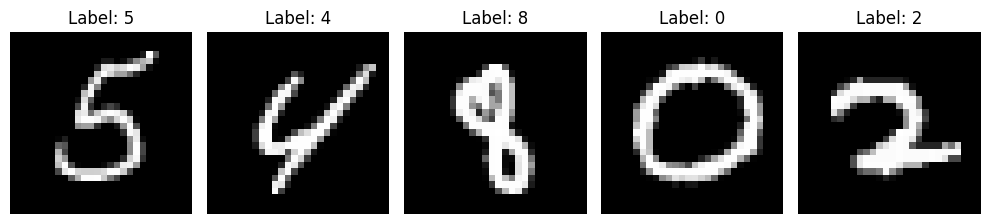

In [17]:
# Visualize the first 5 samples
fig, axes = plt.subplots(1, 5, figsize=(10, 5))
for i in range(5):
    axes[i].imshow(X_train[i].reshape(28, 28), cmap='gray')
    axes[i].set_title(f"Label: {y_train[i]}")
    axes[i].axis('off')
plt.tight_layout()
plt.show()


In [18]:
# Standardize the features (scale pixel values to zero mean and unit variance)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [19]:
# Apply PCA to retain 95% of the variance
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Check the number of components
print("Number of Principal Components:", pca.n_components_)
print("Explained Variance Ratio:", sum(pca.explained_variance_ratio_))


Number of Principal Components: 330
Explained Variance Ratio: 0.9502986411242978


PCA transforms the dataset by projecting it onto a lower-dimensional subspace.<br>
The parameter n_components=0.95 means that the PCA will retain enough principal components to explain 95% of the variance in the data.

Variance:

In PCA, the "variance" represents how much of the dataset's original information is retained by the principal components.<br><br>
PCA orders components by how much variance they explain (eigenvalues). Components explaining more variance are kept, while those contributing less are discarded.

In [20]:
# Train a Random Forest classifier using PCA-transformed data
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train_pca, y_train)

# Predict on the test data
y_pred = model.predict(X_test_pca)


In [21]:
# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9367857142857143
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      1343
           1       0.98      0.98      0.98      1600
           2       0.91      0.94      0.93      1380
           3       0.90      0.93      0.92      1433
           4       0.93      0.95      0.94      1295
           5       0.94      0.90      0.92      1273
           6       0.96      0.96      0.96      1396
           7       0.94      0.94      0.94      1503
           8       0.92      0.89      0.91      1357
           9       0.92      0.91      0.91      1420

    accuracy                           0.94     14000
   macro avg       0.94      0.94      0.94     14000
weighted avg       0.94      0.94      0.94     14000



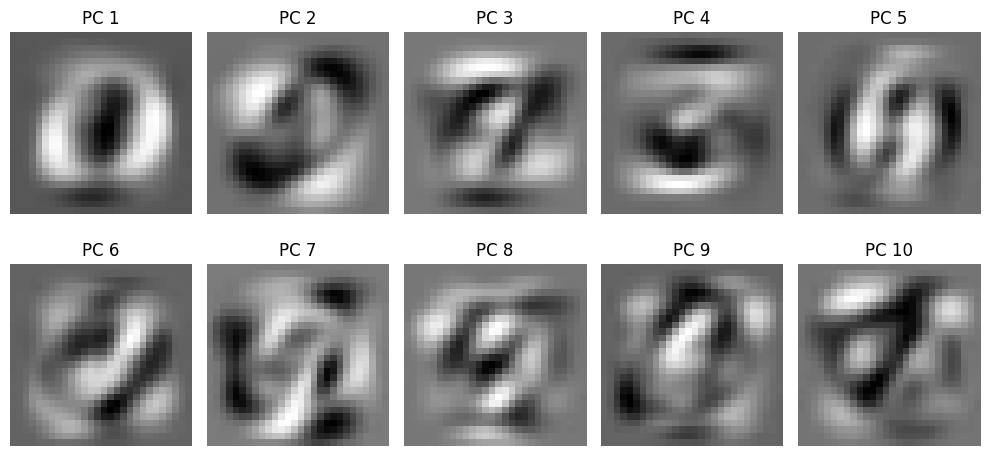

In [22]:
# Visualize the first 10 principal components
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(pca.components_[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"PC {i+1}")
    ax.axis('off')
plt.tight_layout()
plt.show()


In [23]:
from sklearn.pipeline import Pipeline

# Build a pipeline for scaling, PCA, and classification
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95)),
    ('classifier', RandomForestClassifier(random_state=42, n_estimators=100))
])

# Train the pipeline
pipeline.fit(X_train, y_train)

# Evaluate the pipeline
y_pred_pipeline = pipeline.predict(X_test)
print("Pipeline Accuracy:", accuracy_score(y_test, y_pred_pipeline))


Pipeline Accuracy: 0.9367857142857143


Why PCA Reduces Dimensionality?<br>
Instead of working with all 784 features, PCA reduces them to the most "informative" 330 features, where "informative" means contributing significantly to the dataset's variance.<br>
This improves computational efficiency and often reduces overfitting while retaining essential patterns in the data.

### Performance Before PCA ###
Accuracy: 0.9672142857142857
MCC: 0.9635640223598558
AUC: 0.9989373615878747

Classification Report (Before PCA):
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1381
           1       0.98      0.98      0.98      1575
           2       0.97      0.97      0.97      1398
           3       0.96      0.96      0.96      1428
           4       0.97      0.96      0.96      1365
           5       0.97      0.96      0.96      1263
           6       0.97      0.98      0.98      1375
           7       0.97      0.97      0.97      1459
           8       0.96      0.96      0.96      1365
           9       0.94      0.94      0.94      1391

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000

### Performance After PCA ###
Accuracy: 0.9353571428571429
MCC: 0.9281753787071896
AUC: 0.99606

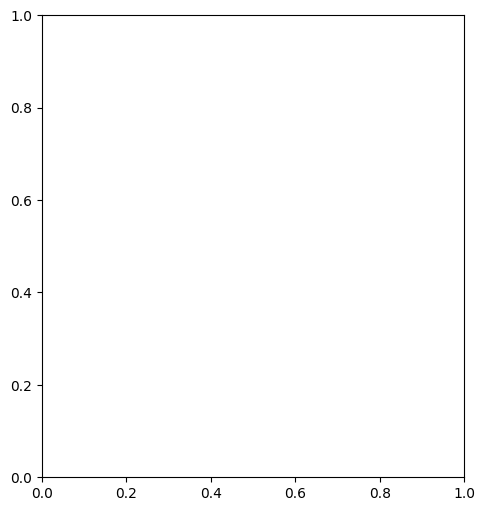

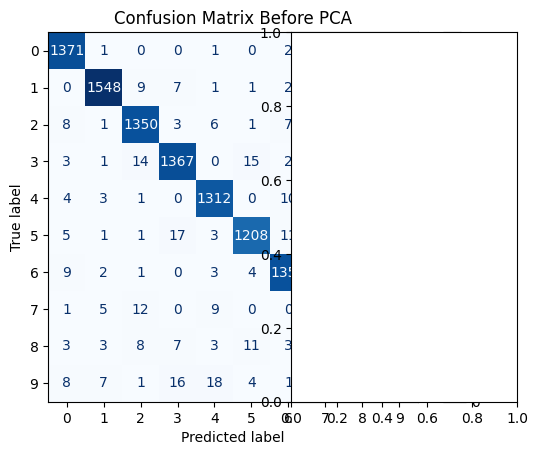

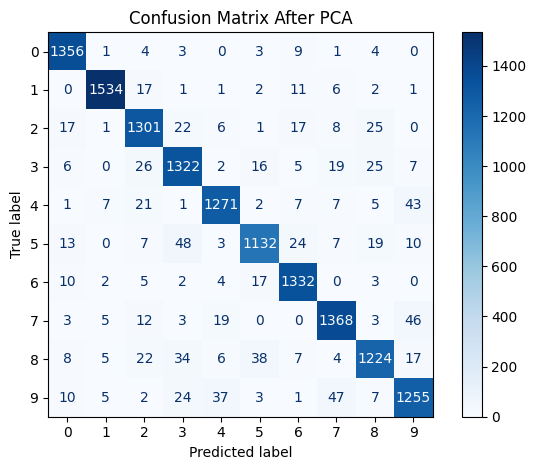

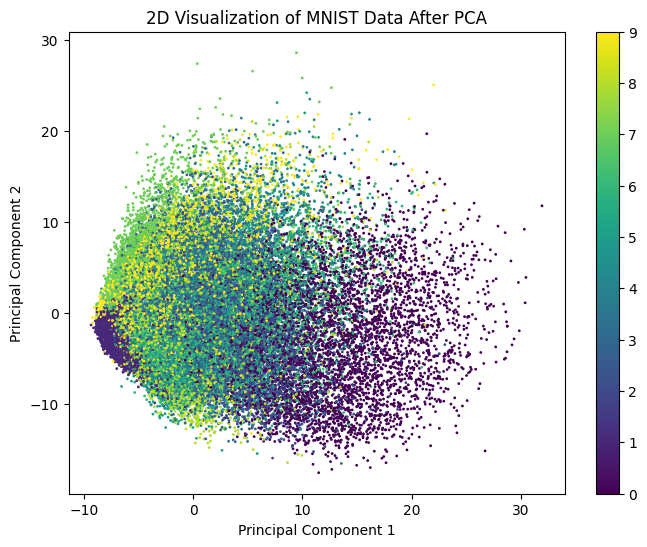

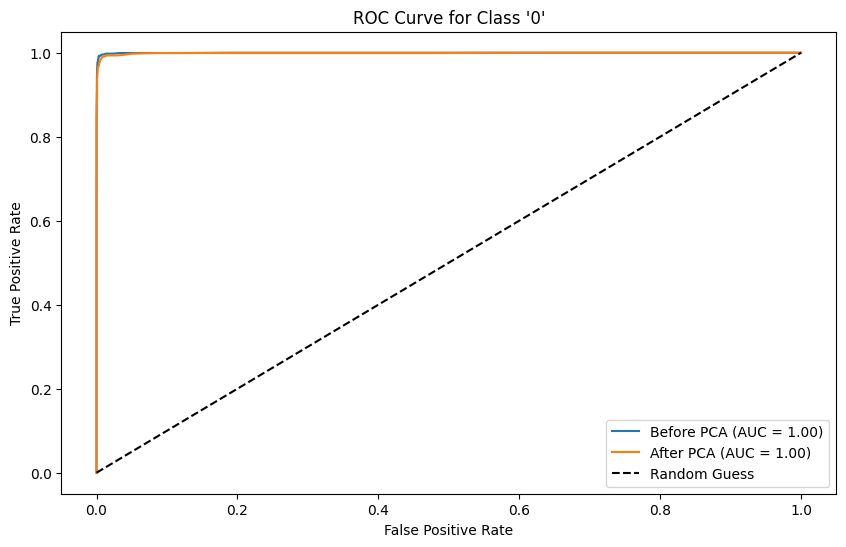

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score, classification_report, roc_auc_score, roc_curve,
    matthews_corrcoef, confusion_matrix, ConfusionMatrixDisplay
)
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target
y = y.astype(int)  # Ensure y is an integer type

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Step 1: Before PCA - Random Forest on Raw Data ###
model_raw = RandomForestClassifier(random_state=42, n_estimators=100)
model_raw.fit(X_train_scaled, y_train)
y_pred_raw = model_raw.predict(X_test_scaled)
y_prob_raw = model_raw.predict_proba(X_test_scaled)

# Evaluate performance before PCA
accuracy_raw = accuracy_score(y_test, y_pred_raw)
mcc_raw = matthews_corrcoef(y_test, y_pred_raw)
auc_raw = roc_auc_score(y_test, y_prob_raw, multi_class="ovr")
print("### Performance Before PCA ###")
print(f"Accuracy: {accuracy_raw}")
print(f"MCC: {mcc_raw}")
print(f"AUC: {auc_raw}")
print("\nClassification Report (Before PCA):\n", classification_report(y_test, y_pred_raw))

# Plot ROC for one class (e.g., digit '0')
fpr_raw, tpr_raw, _ = roc_curve(y_test == 0, y_prob_raw[:, 0])  # Binary ROC for class '0'

### Step 2: Apply PCA ###
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train Random Forest on PCA-transformed data
model_pca = RandomForestClassifier(random_state=42, n_estimators=100)
model_pca.fit(X_train_pca, y_train)
y_pred_pca = model_pca.predict(X_test_pca)
y_prob_pca = model_pca.predict_proba(X_test_pca)

# Evaluate performance after PCA
accuracy_pca = accuracy_score(y_test, y_pred_pca)
mcc_pca = matthews_corrcoef(y_test, y_pred_pca)
auc_pca = roc_auc_score(y_test, y_prob_pca, multi_class="ovr")
print("### Performance After PCA ###")
print(f"Accuracy: {accuracy_pca}")
print(f"MCC: {mcc_pca}")
print(f"AUC: {auc_pca}")
print("\nClassification Report (After PCA):\n", classification_report(y_test, y_pred_pca))

# Plot ROC for one class (e.g., digit '0') after PCA
fpr_pca, tpr_pca, _ = roc_curve(y_test == 0, y_prob_pca[:, 0])  # Binary ROC for class '0'

### Step 3: Visualizations ###

# Confusion Matrix Before and After PCA
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_raw, cmap="Blues")
plt.title("Confusion Matrix Before PCA")

plt.subplot(1, 2, 2)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_pca, cmap="Blues")
plt.title("Confusion Matrix After PCA")
plt.tight_layout()
plt.show()

# Visualize PCA-transformed data (using only 2 components for visualization)
pca_2d = PCA(n_components=2)
X_train_2d = pca_2d.fit_transform(X_train_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, cmap='viridis', s=1)
plt.colorbar()
plt.title("2D Visualization of MNIST Data After PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# ROC Curve Before and After PCA
plt.figure(figsize=(10, 6))
plt.plot(fpr_raw, tpr_raw, label="Before PCA (AUC = {:.2f})".format(auc_raw))
plt.plot(fpr_pca, tpr_pca, label="After PCA (AUC = {:.2f})".format(auc_pca))
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Class '0'")
plt.legend()
plt.show()
